# **Tissue Registration**
Developer : Tanvi Patel (tanviben.patel@fda.hhs.gov) and Kahaki Seyed (seyed.kahaki@fda.hhs.gov)


# **Tissue Registration Overview – Aligning WSIs from Different Scanners**
This notebook performs tissue registration to align Whole Slide Images (WSIs) acquired from different scanners or staining protocols (e.g., Aperio and Histech). The goal is to enable accurate comparison, annotation transfer, and downstream analysis in digital pathology.

Users can input two WSI files along with an XML annotation file. Slides from other scanners are also supported. The notebook uses ORB feature matching for image alignment, maps annotations between the slides, extracts corresponding tissue patches, and saves the results in organized directories for easy review and further analysis.

# **Environment Configuration**
Note: This cell installs dependencies for the patch extraction module. If you've already installed the required packages, you can skip this step. Running it again may show errors, but it won't affect your session.

In [ ]:
#!pip install openslide-python
#!pip install openslide-bin
#!pip install scikit-image
!pip install tiffslide

Defaulting to user installation because normal site-packages is not writeable


# **Loading Required Packages**

In [ ]:
# All Imports
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from WSI.tissue_registration import tissue_registration 

# **User input WSIs**

In [ ]:
# Step 1: Collect user input using input()
aperio_path = input("Enter path to Aperio WSI (.svs) (e.g. - ./data/WSIs/aperio-002-0.svs): ").strip() or "./data/WSIs/aperio-002-0.svs".strip()
histech_path = input("Enter path to Histech WSI (.svs)(e.g. - ./data/WSIs/3Dhistech-2-0.svs): ").strip() or "./data/WSIs/3Dhistech-2-0.svs".strip()
xml_path = input("Enter path to XML annotation file (e.g. - ./data/WSIs/aperio-002-0.xml): ").strip() or "./data/WSIs/aperio-002-0.xml".strip()
output_dir = input("Enter output directory to save results (e.g. - ./data/images/tissue_registration): ").strip() or "./data/images/tissue_registration".strip()

Enter path to Aperio WSI (.svs) (e.g. - ./data/WSIs/aperio-002-0.svs):  ./data/WSIs/aperio-002-0.svs
Enter path to Histech WSI (.svs)(e.g. - ./data/WSIs/3Dhistech-2-0.svs):  ./data/WSIs/3Dhistech-2-0.svs
Enter path to XML annotation file (e.g. - ./data/WSIs/aperio-002-0.xml):  ./data/WSIs/aperio-002-0.xml
Enter output directory to save results (e.g. - ./data/images/tissue_registration):  ./data/images/tissue_registration


# **Load WSIs at Downsampled Level-2 (High RAM Recommended)**
WSIs are loaded at downsampled level-2 to balance detail and performance. Thumbnails are often too coarse and may miss important peripheral regions, while full-resolution images are too large to process efficiently. Level-2 retains enough detail for accurate analysis but requires higher RAM, so please ensure adequate system resources.

In [ ]:
pipeline = tissue_registration(aperio_path, histech_path, xml_path, output_dir)

# Step 3: Run the full registration and patch extraction
pipeline.run()

Found 8 annotations in XML.
Aperio slide levels: ((123503, 38380), (30875, 9595), (7718, 2398), (3859, 1199))
Histech slide levels: ((92672, 123904), (46336, 61952), (23168, 30976), (11584, 15488), (5792, 7744), (2896, 3872), (1448, 1936), (724, 968), (362, 484), (181, 242))

 Registration complete.
Saved Aperio patches to: ./data/images/tissue_registration/aperio_patches
Saved Histech patches to: ./data/images/tissue_registration/histech_patches
Saved visualizations to: ./data/images/tissue_registration/visualizations


# **Visualize Annotated Thumbnails**
This notebook cell displays the annotated thumbnails of the two aligned WSIs (e.g., Aperio and Histech). These images are saved in the visualization directory after registration and annotation mapping. They provide a quick overview of the alignment quality and the transferred annotations before proceeding to patch extraction.

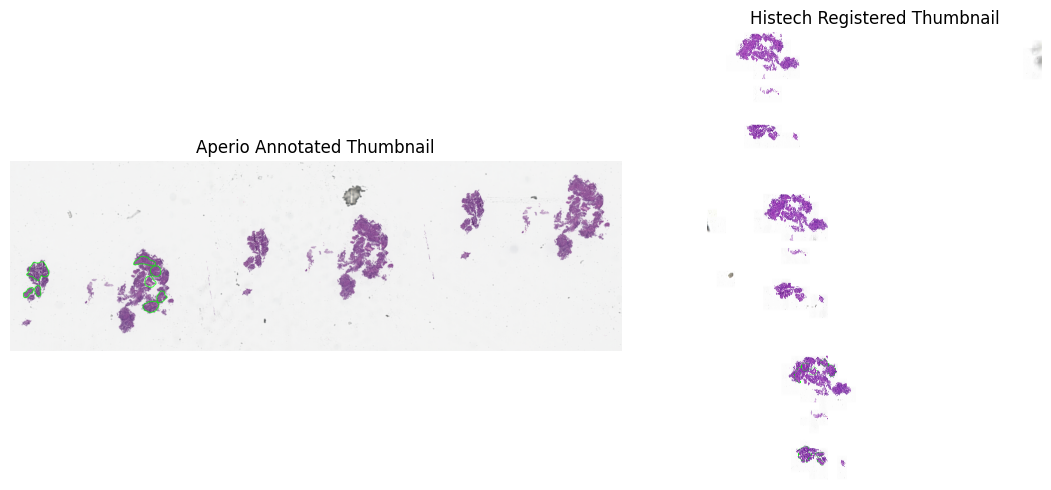

In [ ]:
# Show Annotated Thumbnails
# Vis_dir has two WSIs thumbnail saved
# vis_dir = "./data/images/tissue_registration/visualizations/"
pipeline.show_annotated_thumbnails()
#pipeline.show_annotated_thumbnails(pipeline.vis_dir, aperio_filename="aperio_annotated_thumb.png", histech_filename="histech_registered_thumb.png")

# **Display Registered Patch Pairs**
This notebook cell displays pairs of corresponding tissue patches extracted from the aligned Aperio and Histech WSIs. Showing them side by side allows for visual verification of registration accuracy and annotation consistency across scanners. You can adjust *max_pairs* to control how many patch pairs are displayed.

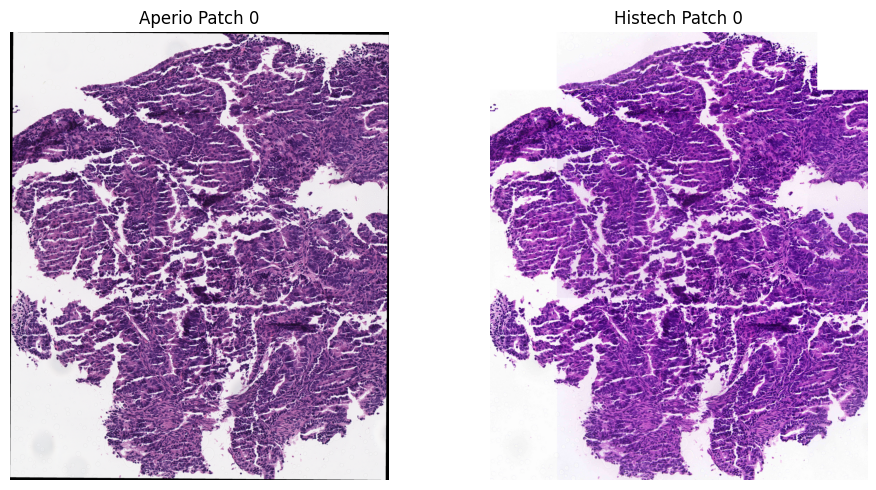

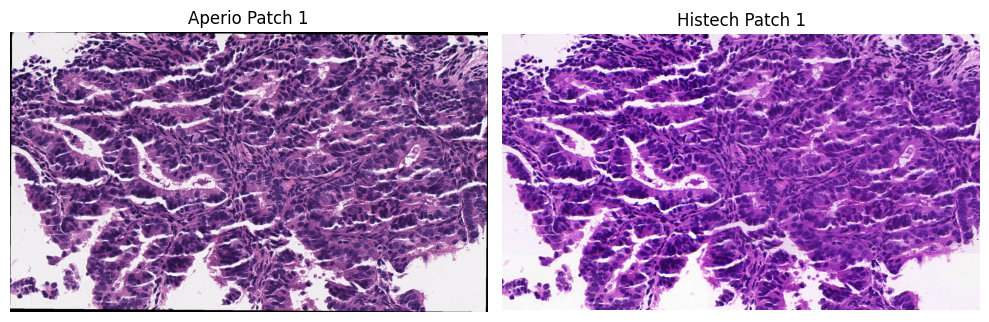

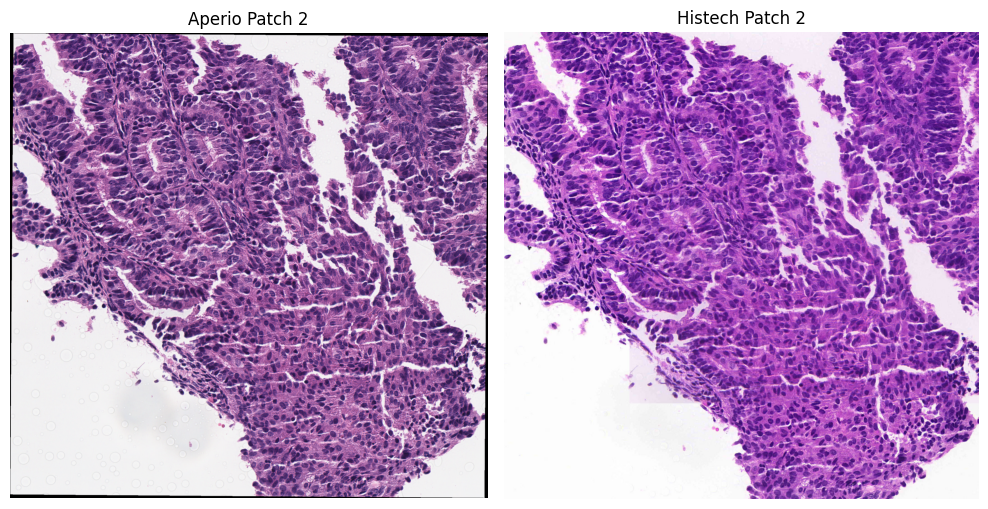

In [ ]:
#Displays pairs of registered patches from Aperio and Histech scanners side by side.
pipeline.show_registered_patches(max_pairs=3)

In [1]:
print("Thank you for using DIDSR's Tissue Registration")

Thank you for using DIDSR's Tissue Registration
